# About Dataset


This dataset is for ABC Multistate bank with following columns:

  - customer_id, unused variable.
  - credit_score,  used as input.
  - country,  used as input.
  - gender,   used as input.
  - age,      used as input.
  - tenure,   used as input.
  - balance,  used as input.
  - products_number, used as input.
  - credit_card, used as input.
  - active_member, used as input.
  - estimated_salary, used as input.

 - churn, used as the target. 
   - 1 if the client has left the bank during some period or 0 if he/she has not.
   - Aim is to Predict the Customer Churn for ABC Bank.



In [9]:
# library imports 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
linreg=LinearRegression() 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import  LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [10]:
cp = pd.read_csv(r"C:\Users\dell\Documents\capston1\Bank Customer Churn Prediction.csv")

In [11]:
cp.shape


(10000, 12)

In [12]:
cp.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
cp.corr()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [14]:
cp.credit_score.corr(cp.churn)

-0.02709353975465779

In [15]:
cp.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
cp.drop('customer_id', axis = 1)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [17]:
cp.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [18]:
cp.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Univariate Analysis

In [19]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


# plots analysis



# Churn Rate Analysis

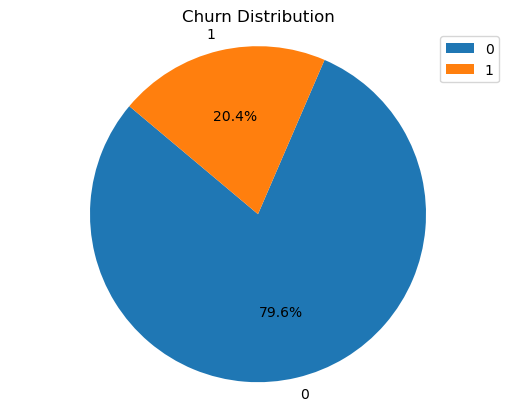

In [20]:
# Calculate the counts of churned and non-churned customers
churn_counts = cp['churn'].value_counts()

plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Churn Distribution')
plt.legend()
plt.show()

# correlation 

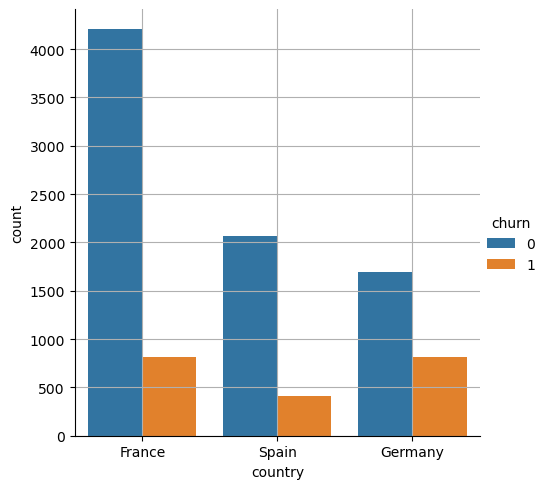

In [21]:
sns.catplot(x="country" ,hue="churn" , kind="count" , data=cp)
plt.grid()

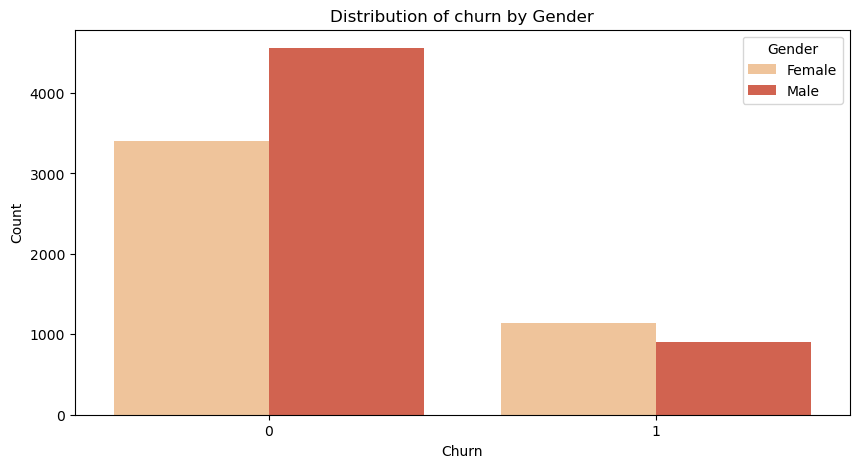

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(cp, x='churn', palette="OrRd", hue='gender')
plt.title("Distribution of churn by Gender")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.show()

<Axes: >

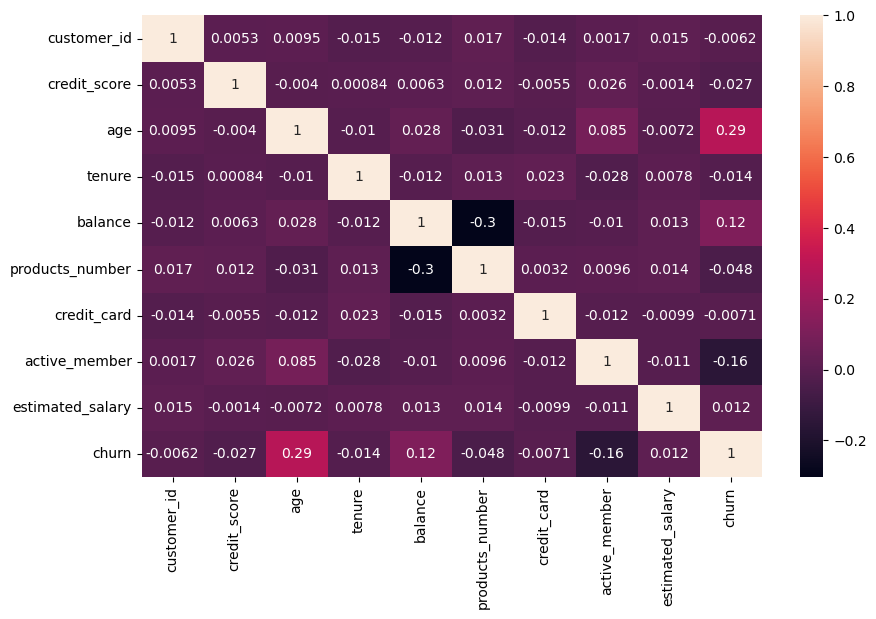

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(cp.corr(),annot=True )

In [26]:
cp.head(2)         

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


# Model Building on Logestic Regration

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
cp.country.replace({'France':0, 'Spain':1, 'Germany':2}, inplace = True)
cp.gender.replace({'Male':1, 'Female' :0}, inplace = True)

In [17]:
from sklearn.model_selection import train_test_split
cp_train, cp_test = train_test_split(cp, test_size = .2)

In [18]:
cp_train_x = cp_train.iloc[::, 1:-1]
cp_train_y = cp_train.iloc[::, -1]

cp_test_x = cp_test.iloc[::, 1:-1]
cp_test_y = cp_test.iloc[::, -1]

In [19]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()

In [20]:
logreg.fit(cp_train_x , cp_train_y)

LogisticRegression()

In [21]:
pred_train = logreg.predict(cp_train_x)
pred_test = logreg.predict(cp_test_x)

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
mat_test = confusion_matrix(cp_test_y , pred_test)
mat_test 

array([[1574,   42],
       [ 352,   32]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score,recall_score,precision_score ,classification_report

In [49]:
accuracy_score(cp_test_y , pred_test) 

0.803

In [51]:
print(classification_report(cp_test_y , pred_test))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1616
           1       0.43      0.08      0.14       384

    accuracy                           0.80      2000
   macro avg       0.62      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()

In [27]:
dec.fit(cp_train_x,cp_train_y)

DecisionTreeClassifier()

In [28]:
pred_train_cp=dec.predict(cp_train_x)
pred_test_cp=dec.predict(cp_test_x)

In [29]:
pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
mat_test=confusion_matrix(cp_test_y,pred_test_cp)
mat_test

array([[1375,  241],
       [ 177,  207]], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [54]:
print(classification_report(cp_test_y,pred_test_cp))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1616
           1       0.46      0.54      0.50       384

    accuracy                           0.79      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.80      0.79      0.80      2000



# Roc curve 

In [34]:
pred_prob_test=dec.predict_proba(cp_test_x)
len(pred_prob_test)

2000

In [35]:
cp_test_x.shape

(2000, 10)

In [36]:
from sklearn.metrics import roc_auc_score,roc_curve

In [37]:
roc_auc_score(cp_test_y,pred_prob_test[:,1])

0.6949644183168316

In [38]:
fpr,tpr,thre=roc_curve(cp_test_y,pred_prob_test[:,1])

In [39]:
fpr

array([0.        , 0.14913366, 1.        ])

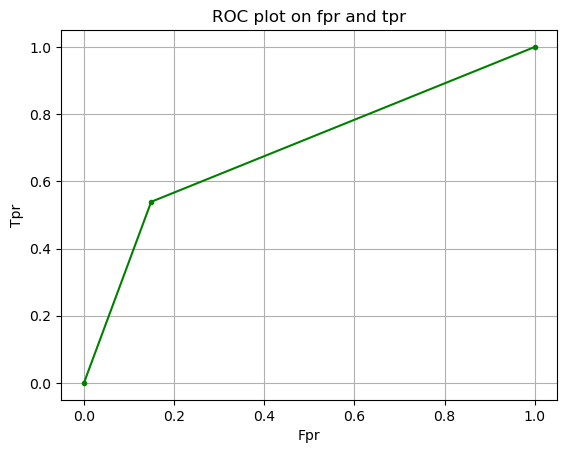

In [40]:
plt.plot(fpr,tpr,marker='.',color='green')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title("ROC plot on fpr and tpr")
plt.grid()

# Feature Importance

In [41]:
feat_imp=pd.DataFrame()
feat_imp['features']=cp_train_x.columns
feat_imp['imp']=dec.feature_importances_

feat_imp=feat_imp.sort_values('imp',ascending=False)
feat_imp

,features,imp
3,age,0.228202
5,balance,0.163252
0,credit_score,0.152943
9,estimated_salary,0.152153
6,products_number,0.107420
4,tenure,0.068717
8,active_member,0.059086
1,country,0.034075
2,gender,0.018361
7,credit_card,0.015791


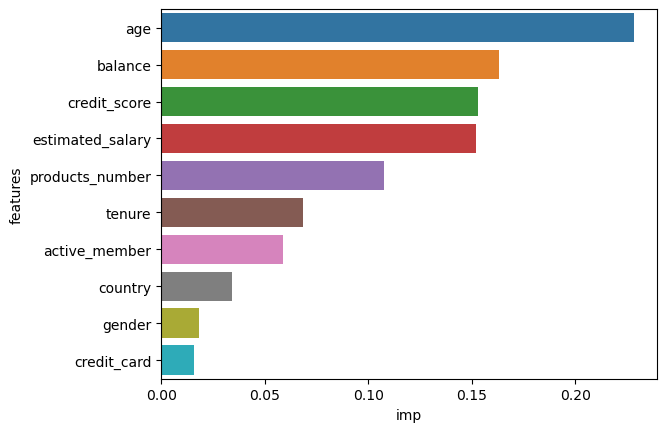

In [42]:
sns.barplot(y=feat_imp['features'],x=feat_imp['imp'])
plt.show()

# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [44]:
rfc.fit(cp_train_x, cp_train_y)

RandomForestClassifier()

In [45]:
pred_rfc = rfc.predict(cp_test_x)

In [46]:
tab_rfc=confusion_matrix(cp_test_y,pred_rfc)
tab_rfc

array([[1561,   55],
       [ 197,  187]], dtype=int64)

In [56]:
print(classification_report(cp_test_y,pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1616
           1       0.77      0.49      0.60       384

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.87      0.87      0.86      2000



# Classification Model Performance Report

 - This report summarizes the performance of various classification algorithms
   on the dataset using accuracy as the evaluation metric. 
 - The dataset was split into training and testing sets, and each model was trained 
   on the training set and evaluated on the testing set.

# Final conclusion

- By using machine algorithm such as Logistic Regression, Decision Tree , Random Forest demonstrated superior performance .


- Logistic regression  performed well, achieving an accuracy of near 80%.
- Decision Tree performed well, achieving an accuracy of 79%.
- Random Forest also performed well, achieving an accuracy of 86%.